In [20]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [21]:
# Download dataset from kaggle
path = kagglehub.dataset_download("holoong9291/gdp-of-all-countries19602020")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\David\.cache\kagglehub\datasets\holoong9291\gdp-of-all-countries19602020\versions\3


In [22]:
# Load and preview data
data = pd.read_csv(path+"/gdp_1960_2020.csv")
data.head()

,year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,543300000000,0.468483
1,1960,2,United Kingdom,Europe,73233967692,0.063149
2,1960,3,France,Europe,62225478000,0.053656
3,1960,4,China,Asia,59716467625,0.051493
4,1960,5,Japan,Asia,44307342950,0.038206


In [23]:
# Specify parameters
country = "Austria"

# Visualisation and forecasting of GDP data
In this exercise, economical data from a kaggle dataset (https://www.kaggle.com/datasets/rinichristy/countries-gdp-19602020) is used for visualisation and simple forecasting.

The data has been taken from kaggle and includes historic GDP data on a large number of countries ranging from 1960 to 2020.

For forecasting the methods linear and quadratic regression will be used in order to estimate the GDP of Austria in the years 2025, 2050 and 2075.

## Visualise GDP on a graph

<Axes: xlabel='year', ylabel='gdp'>

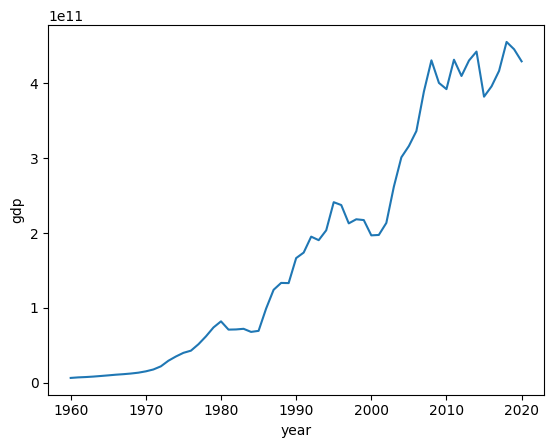

In [24]:
# Display country-specific gdp as a lineplot
sb.lineplot(data=data.loc[data["country"] == country, :], x="year", y="gdp")

## Forecasting using linear regression

Sum of squared residuals: [1.01428655e+23]


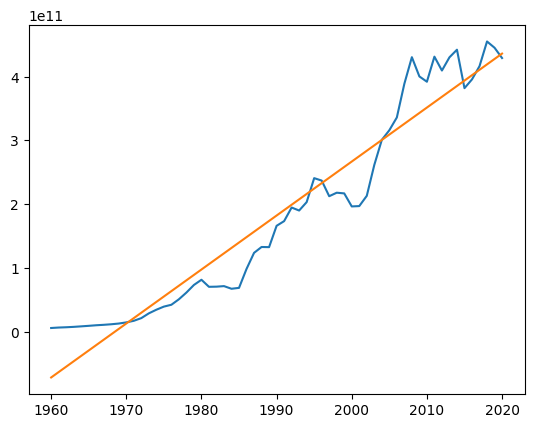

In [25]:
# Filter country-specific data from the dataset
X = data.loc[data["country"] == country]["year"]
y = data.loc[data["country"] == country]["gdp"]

# Calculate linear regression on gdp data
z, res, rank, sing_vals, rcond = np.polyfit(X, y, 1, full=True)
z = np.poly1d(z)

# Print diagnostics
print("Sum of squared residuals: "+str(res))

# Visualise
plt.plot(X, y)
plt.plot(X, z(X))
plt.show()

GDP in 2025: 478152156432.4707
GDP in 2050: 689293820126.2129
GDP in 2075: 900435483819.9551


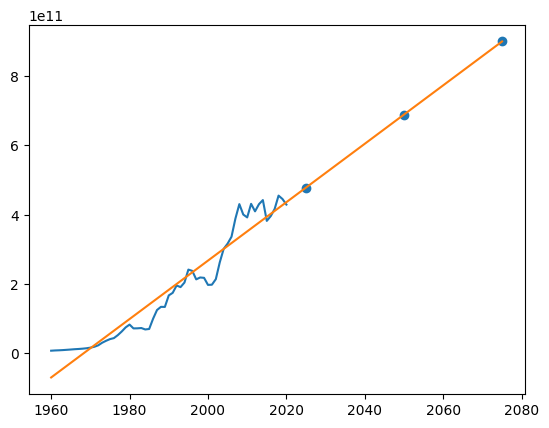

In [26]:
# Filter country-specific data from the dataset
X = data.loc[data["country"] == country]["year"]
y = data.loc[data["country"] == country]["gdp"]
predX = np.array([2025, 2050, 2075])
totalX = np.concatenate([np.array(X), predX])

# Calculate linear regression on gdp data
z, res, rank, sing_vals, rcond = np.polyfit(X, y, 1, full=True)
z = np.poly1d(z)
predY = z(predX)
print("GDP in 2025: "+str(predY[0]))
print("GDP in 2050: "+str(predY[1]))
print("GDP in 2075: "+str(predY[2]))

# Visualise
plt.plot(X, y)
plt.plot(totalX, z(totalX))
plt.scatter(predX, predY)
plt.show()

## Forecasting using quadratic regression

Sum of squared residuals: [5.49228045e+22]


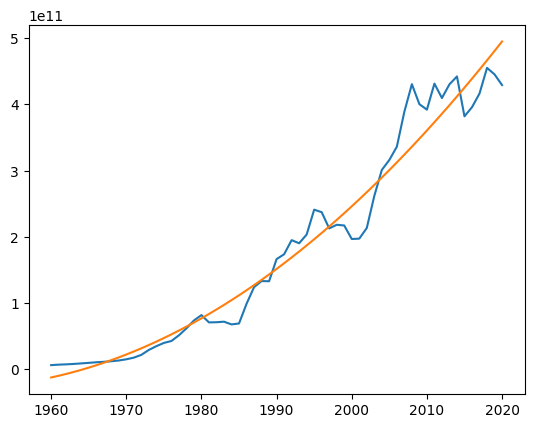

In [27]:
# Filter country-specific data from the dataset
X = np.array(data.loc[data["country"] == country]["year"])
y = np.array(data.loc[data["country"] == country]["gdp"])

# Calculate quadratic regression
z, res, rank, sing_vals, rcond = np.polyfit(X, y, 2, full=True)
z = np.poly1d(z)
print("Sum of squared residuals: "+str(res))

# Visualise
plt.plot(X, y)
plt.plot(X, z(X))
plt.show()

GDP in 2025: 569306731964.9375
GDP in 2050: 1017051802095.5
GDP in 2075: 1589324980877.0


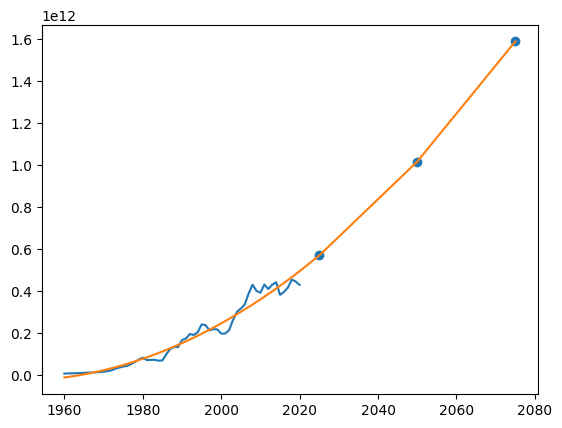

In [28]:
# Filter country-specific data from the dataset
X = data.loc[data["country"] == country]["year"]
y = data.loc[data["country"] == country]["gdp"]
predX = np.array([2025, 2050, 2075])
totalX = np.concatenate([np.array(X), predX])

# Calculate linear regression on gdp data
z, res, rank, sing_vals, rcond = np.polyfit(X, y, 2, full=True)
z = np.poly1d(z)
predY = z(predX)
print("GDP in 2025: "+str(predY[0]))
print("GDP in 2050: "+str(predY[1]))
print("GDP in 2075: "+str(predY[2]))

# Visualise
plt.plot(X, y)
plt.plot(totalX, z(totalX))
plt.scatter(predX, predY)
plt.show()

## Conclusion
In this exercise, economical data has been used for visualisation and simple forecasting. The library matplotlib has been used for visualisation and plotly for linear and quadratic regression. As economic growth can be influenced by a lot of external factors, the featured regression methods are of course way too simplistic and shouldn't be used for serious applications. Looking at the diagnostics, the sum of squared residuals shows that the error is lower with the quadratic regression method, which shows that it is more accurately fitting the data than the linear regression method.